<a href="https://colab.research.google.com/github/wasimsse/StyleTransfer/blob/main/StyleTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io
import tensorflow_hub as hub
from google.colab import files

In [4]:
def load_image(uploaded):
    max_dim = 512
    img = Image.open(io.BytesIO(uploaded))
    img = img.convert('RGB')
    img = img.resize((max_dim, max_dim))
    img = np.array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img


In [13]:
def load_image(uploaded):
    max_dim = 512
    img = Image.open(io.BytesIO(uploaded))
    img = img.convert('RGB')
    img = img.resize((max_dim, max_dim))
    img = np.array(img)
    img = img.astype(np.float32) / 255.0  # Ensure conversion to float32
    img = np.expand_dims(img, axis=0)
    return img


In [14]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)


In [20]:
uploaded = files.upload()
content_image = load_image(next(iter(uploaded.values())))


Saving Waseem.jpg to Waseem (1).jpg


In [21]:
uploaded = files.upload()
style_image = load_image(next(iter(uploaded.values())))


Saving styleimage.jpg to styleimage.jpg


In [22]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


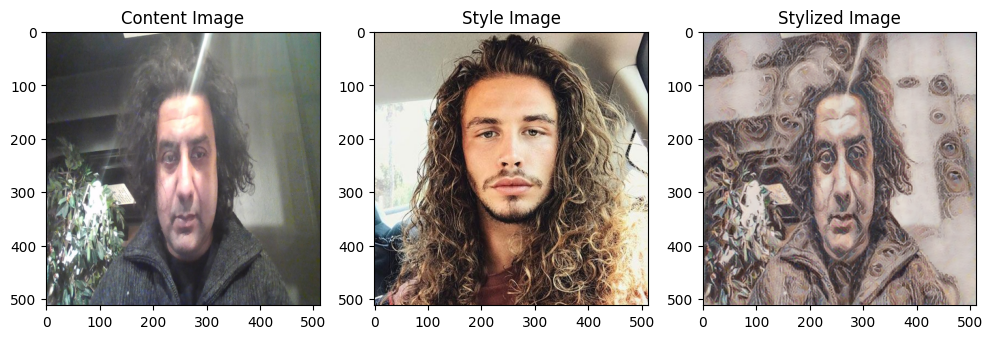

In [23]:
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 3, 2)
imshow(style_image, 'Style Image')

plt.subplot(1, 3, 3)
imshow(stylized_image, 'Stylized Image')

plt.show()
